# **Introduction to Seaborn**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


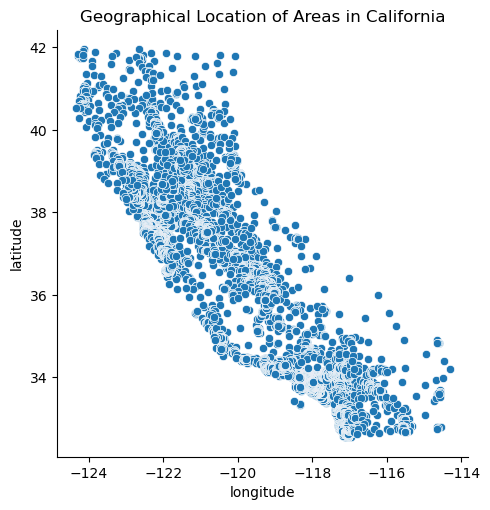

In [4]:
g = sns.relplot(kind='scatter', data=df, x='longitude', y='latitude')
g.set(
    title='Geographical Location of Areas in California'
)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

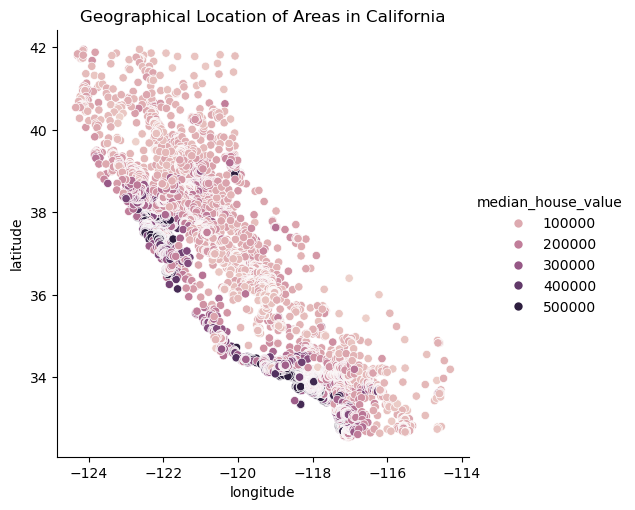

In [6]:
g = sns.relplot(kind='scatter', data=df, x='longitude', y='latitude', hue='median_house_value')
g.set(
    title='Geographical Location of Areas in California'
)

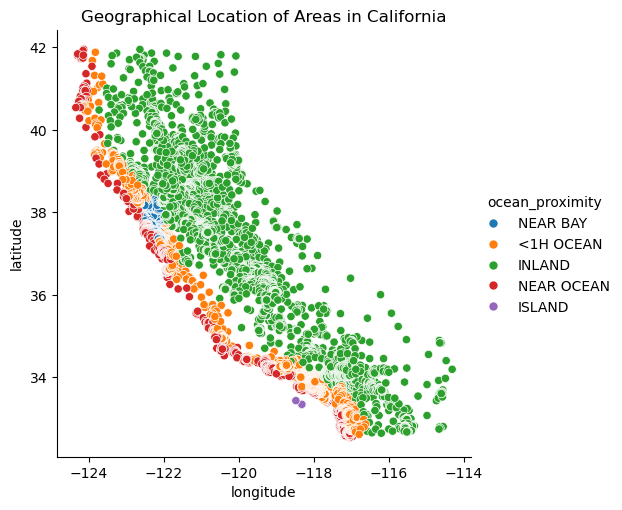

In [7]:
g = sns.relplot(kind='scatter', data=df, x='longitude', y='latitude', hue='ocean_proximity')
g.set(
    title='Geographical Location of Areas in California'
)

In [8]:
df['above_median_house_value'] = (df['median_house_value'] > df['median_house_value'].median())
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,above_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,True


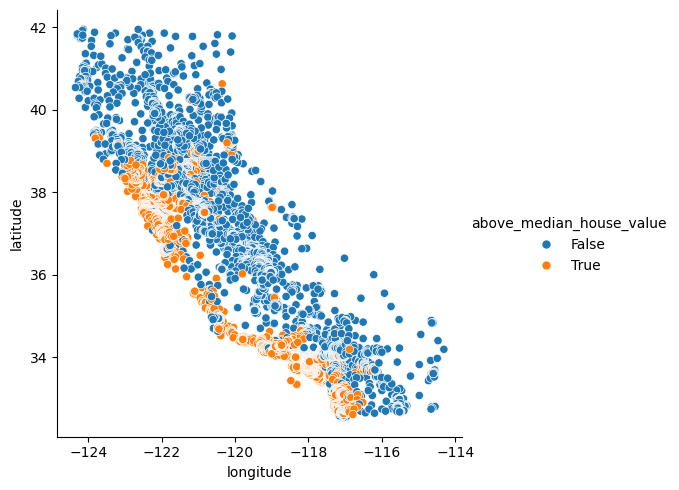

In [9]:
g = sns.relplot(kind='scatter', data=df, x='longitude', y='latitude', hue='above_median_house_value')


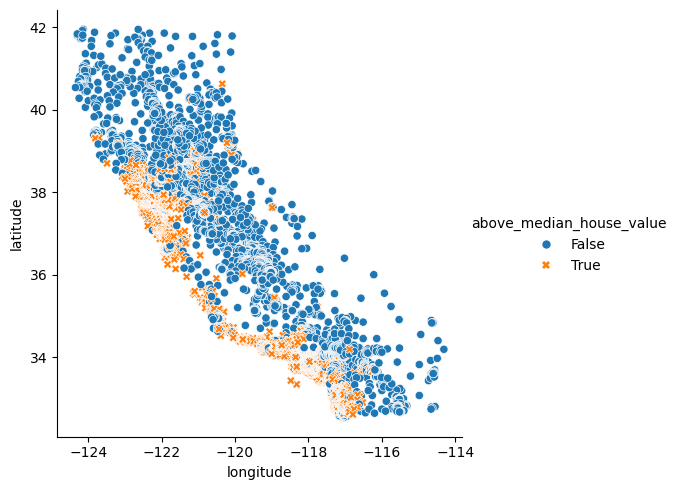

In [10]:
g = sns.relplot(kind='scatter',
                data=df,
                x='longitude',
                y='latitude',
                style='above_median_house_value', 
                hue='above_median_house_value')

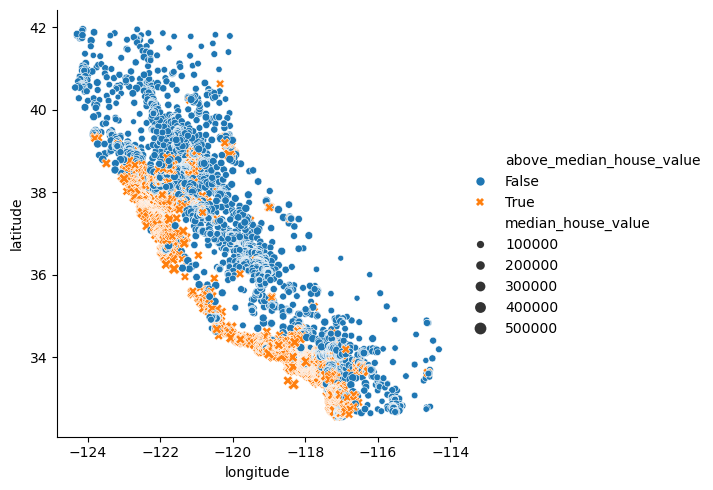

In [11]:
g = sns.relplot(kind='scatter',
                data=df,
                x='longitude',
                y='latitude',
                style='above_median_house_value', 
                hue='above_median_house_value', 
                size='median_house_value')

## Working with dates

In [12]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [13]:
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [14]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [16]:
ufo['Time']

0       1930-06-01 22:00:00
1       1930-06-30 20:00:00
2       1931-02-15 14:00:00
3       1931-06-01 13:00:00
4       1933-04-18 19:00:00
                ...        
18236   2000-12-31 23:00:00
18237   2000-12-31 23:00:00
18238   2000-12-31 23:45:00
18239   2000-12-31 23:45:00
18240   2000-12-31 23:59:00
Name: Time, Length: 18241, dtype: datetime64[ns]

## Categorical plot

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,above_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,True


In [23]:
df.shape

(20640, 11)

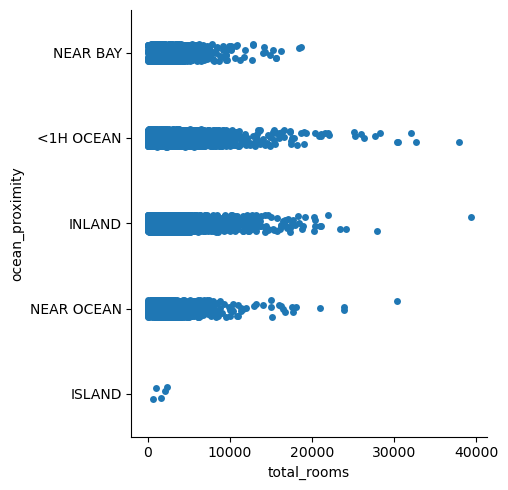

In [22]:
sns.catplot(  # categorical plot
    x='total_rooms', y='ocean_proximity', data=df
)

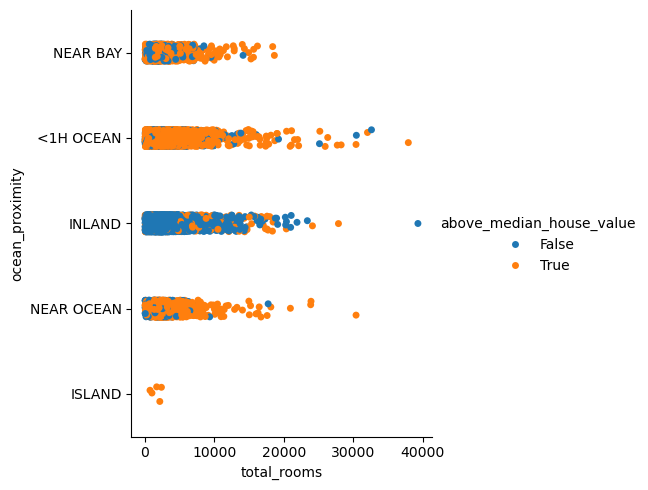

In [24]:
sns.catplot(  # categorical plot
    x='total_rooms', y='ocean_proximity', data=df, hue='above_median_house_value'
)

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

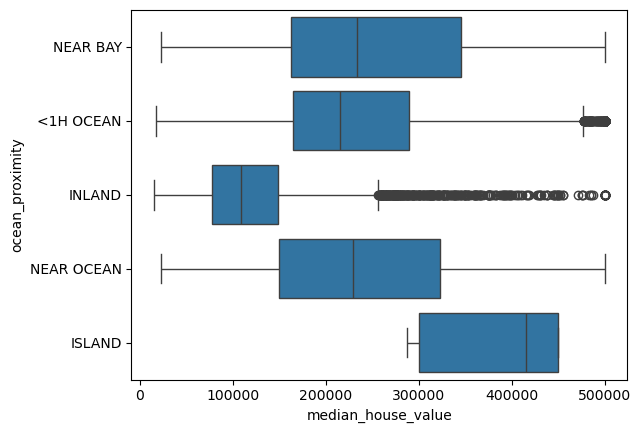

In [25]:
sns.boxplot(
    x='median_house_value', y='ocean_proximity', data=df
)

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

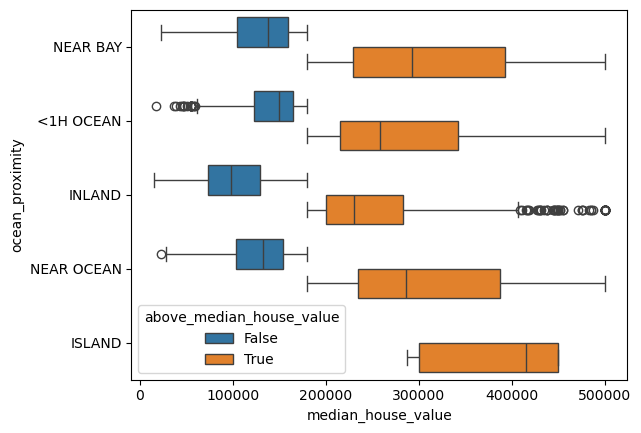

In [26]:
sns.boxplot(
    x='median_house_value', y='ocean_proximity', data=df, hue='above_median_house_value'
)

<Axes: xlabel='housing_median_age', ylabel='ocean_proximity'>

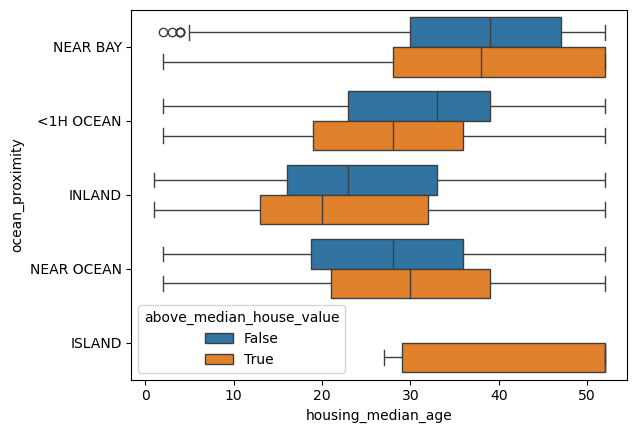

In [27]:
sns.boxplot(
    x='housing_median_age', y='ocean_proximity', data=df, hue='above_median_house_value'
)

<Axes: xlabel='ocean_proximity', ylabel='housing_median_age'>

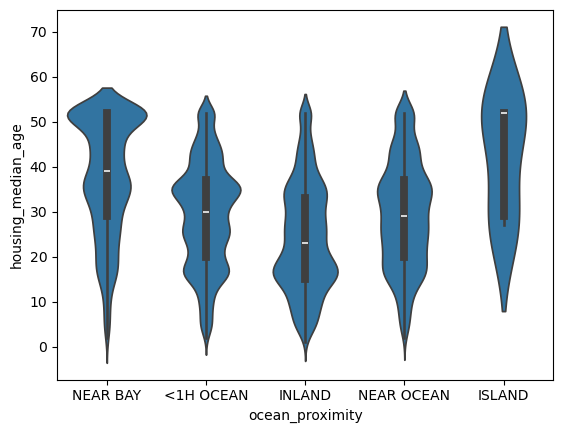

In [31]:
sns.violinplot(
    y='housing_median_age', x='ocean_proximity', data=df
)

## Statistical plotting

In [32]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Percent'>

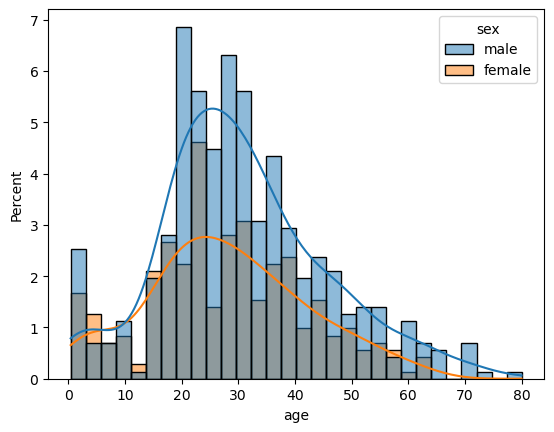

In [37]:
sns.histplot(data=titanic, x='age', bins=30, kde=True, stat='percent', hue='sex')

In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Percent'>

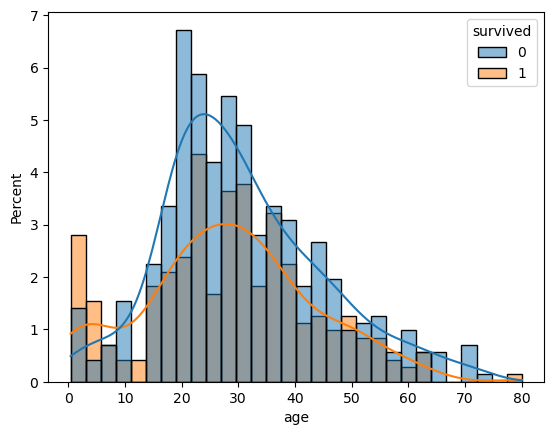

In [40]:
sns.histplot(data=titanic, x='age', bins=30, kde=True, stat='percent', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

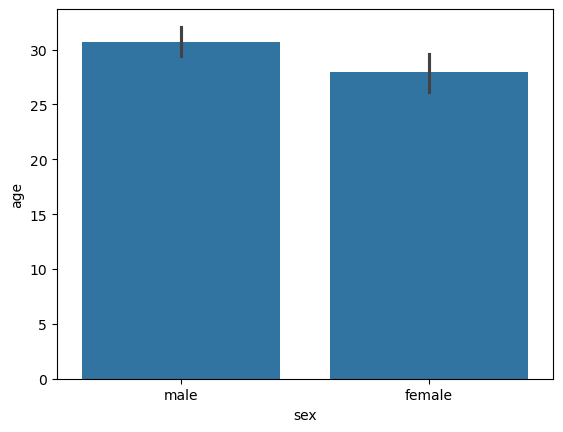

In [42]:
sns.barplot(
    x='sex', y='age', data=titanic
)

<Axes: xlabel='sex', ylabel='survived'>

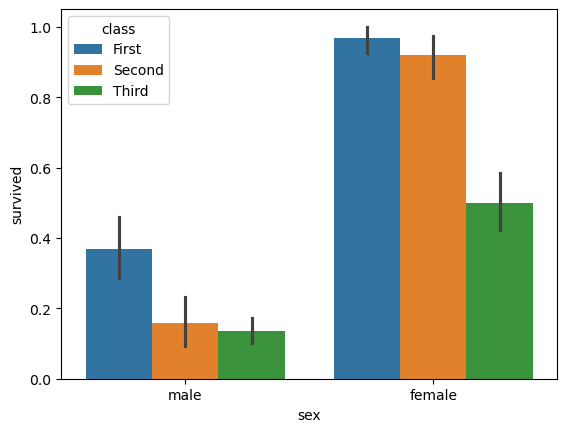

In [44]:
sns.barplot(
    y='survived', x='sex', data=titanic, hue='class'
)